In [1]:
import pandas as pd

In [2]:
claim_df=pd.read_csv("claimants.csv")

In [3]:
claim_df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
claim_df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [6]:
claim_df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
claim_df["CLMSEX"]=claim_df["CLMSEX"].fillna(1)
claim_df['SEATBELT']=claim_df['SEATBELT'].fillna(1)
claim_df["CLMAGE"]=claim_df["CLMAGE"].fillna(claim_df["CLMAGE"].mean())
claim_df['CLMINSUR']=claim_df['CLMINSUR'].fillna(1)

In [8]:
claim_df.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [9]:
x=claim_df.drop(["CASENUM","ATTORNEY"],axis=1)

In [10]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [11]:
y=claim_df["ATTORNEY"]

In [12]:

y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [15]:
x_train.shape

(1005, 5)

In [16]:
model=DecisionTreeClassifier()

In [17]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
y_pred=model.predict(x_train)

In [19]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], shape=(1005,))

In [20]:
accuracy_score(y_train,y_pred)

0.9960199004975124

In [21]:
y_pred_test=model.predict(x_test)

In [22]:
y_pred_test

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [23]:
accuracy_score(y_test,y_pred_test)

0.6388059701492538

In [24]:
#overfitting happended

In [25]:
model1=DecisionTreeClassifier(max_depth=5)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_train)
print(accuracy_score(y_train,y_pred))
y_pred_test=model1.predict(x_test)
print(accuracy_score(y_test,y_pred_test))

0.7492537313432835
0.7402985074626866


In [26]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

[Text(0.46072848308934883, 0.98, 'x[4] <= 0.904\ngini = 0.5\nsamples = 1005\nvalue = [518, 487]'),
 Text(0.20944283190307925, 0.94, 'x[3] <= 5.5\ngini = 0.391\nsamples = 431\nvalue = [115.0, 316.0]'),
 Text(0.33508565749621405, 0.96, 'True  '),
 Text(0.06587582029278143, 0.9, 'x[4] <= 0.012\ngini = 0.496\nsamples = 68\nvalue = [31, 37]'),
 Text(0.061837455830388695, 0.86, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.06991418475517415, 0.86, 'x[4] <= 0.581\ngini = 0.5\nsamples = 61\nvalue = [31, 30]'),
 Text(0.0348308934881373, 0.82, 'x[4] <= 0.073\ngini = 0.497\nsamples = 52\nvalue = [24, 28]'),
 Text(0.012115093387178193, 0.78, 'x[3] <= 1.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.008076728924785462, 0.74, 'x[4] <= 0.015\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.004038364462392731, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.012115093387178193, 0.7, 'x[4] <= 0.056\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.008076728924785462, 0.6

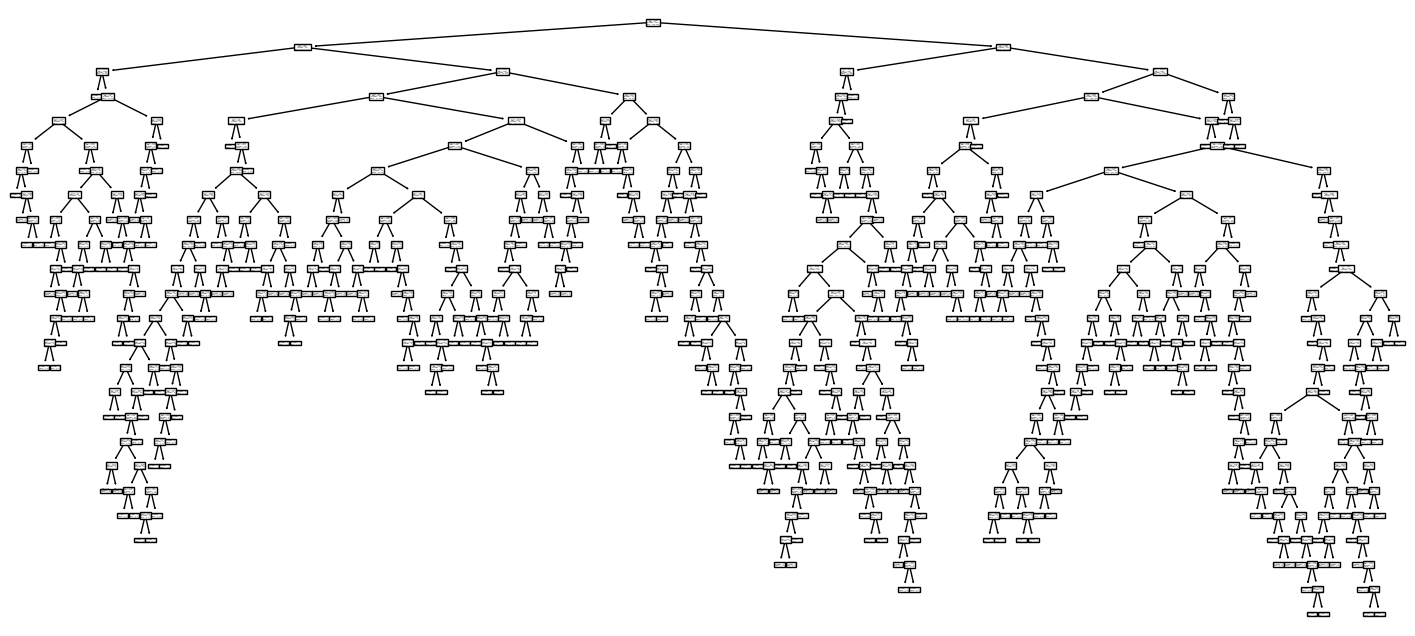

In [27]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model)

[Text(0.509375, 0.9166666666666666, 'x[4] <= 0.904\ngini = 0.5\nsamples = 1005\nvalue = [518, 487]'),
 Text(0.2375, 0.75, 'x[3] <= 5.5\ngini = 0.391\nsamples = 431\nvalue = [115.0, 316.0]'),
 Text(0.3734375, 0.8333333333333333, 'True  '),
 Text(0.075, 0.5833333333333334, 'x[4] <= 0.012\ngini = 0.496\nsamples = 68\nvalue = [31, 37]'),
 Text(0.05, 0.4166666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.1, 0.4166666666666667, 'x[4] <= 0.581\ngini = 0.5\nsamples = 61\nvalue = [31, 30]'),
 Text(0.05, 0.25, 'x[4] <= 0.073\ngini = 0.497\nsamples = 52\nvalue = [24, 28]'),
 Text(0.025, 0.08333333333333333, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.075, 0.08333333333333333, 'gini = 0.478\nsamples = 38\nvalue = [15, 23]'),
 Text(0.15, 0.25, 'x[4] <= 0.815\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.175, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4, 0

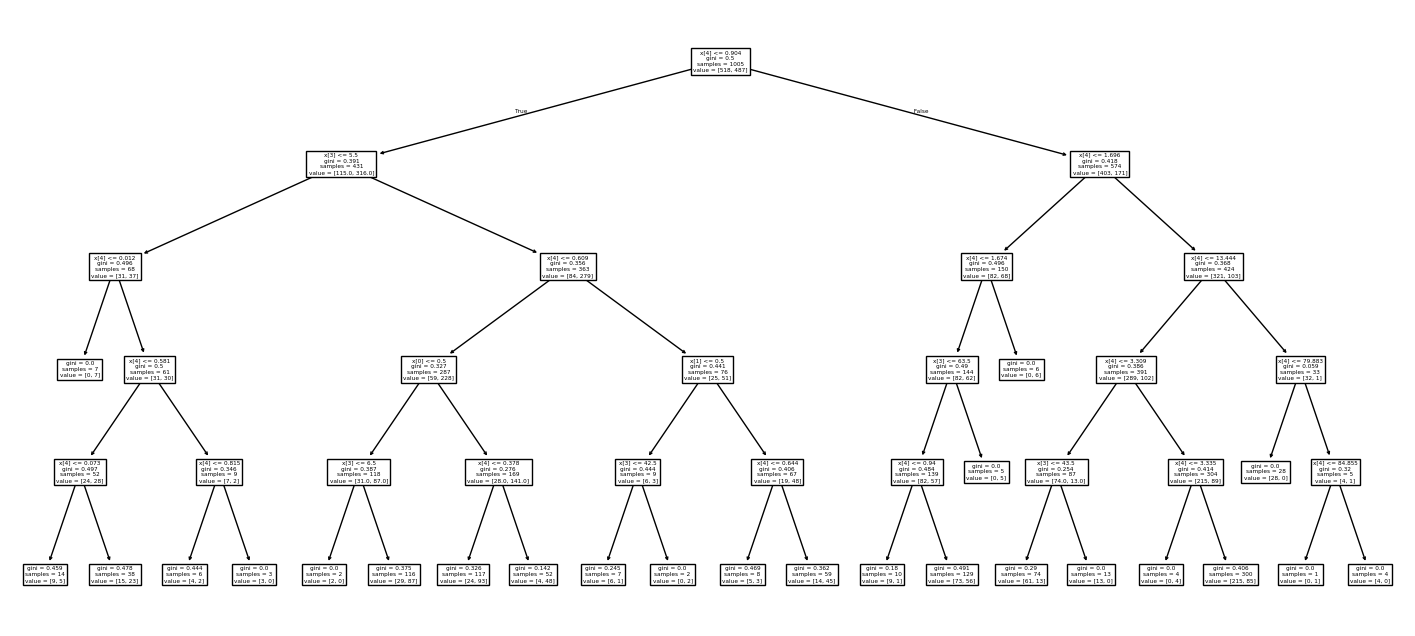

In [28]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model1)

In [29]:
#grid search cv

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
gridsearch=GridSearchCV(estimator=model1,param_grid={"criterion":["gini", "entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10]},cv=5)

In [32]:
gridsearch.fit(x_train,y_train)

,estimator,DecisionTreeC...r(max_depth=5)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [33]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [34]:
gridsearch.best_score_

np.float64(0.708457711442786)

In [35]:
gridsearch.fit(x_test,y_test)

,estimator,DecisionTreeC...r(max_depth=5)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [36]:
gridsearch.best_score_

np.float64(0.7611940298507462)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model2=RandomForestClassifier()

In [39]:
model2.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_train_pred=model2.predict(x_train)

In [41]:
y_train_pred

array([1, 0, 1, ..., 0, 1, 1], shape=(1005,))

In [42]:
accuracy_score(y_train,y_train_pred)

0.9960199004975124

In [43]:
y_test_predict=model2.predict(x_test)

In [44]:
y_test_predict

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [45]:
accuracy_score(y_test,y_test_predict)

0.7134328358208956